here dataset is about 'car price'. there are 26 variables, out of which 25 are feature var(x) and 'price' is target var(y), which has numerical data.
hence we will use Regression Analysis to build the model. Regresion Analysis includes linear and non-linear analysis depending upon relationship 
between x and y variables. also there exist Multiple LR and Polynomial Regression depends on no. of x var we are using to predict for y var.
objective : to predict car price by considering all of its features.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cap = pd.read_csv(r"C:\5 Machine Learning\ML\car_price.csv")

In [3]:
cap.head(5)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
cap.shape

(205, 26)

In [5]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

here, some columns includes special character i.e '?'.it should be removed otherwise it will affect accuracy.

In [6]:
#cap.normalized_losses = cap.normalized_losses.replace({'?':161})

replacing spl char directly by mode is not always appropriate way. so we convert them into null and then fill with proper values.

In [7]:
cap = cap.replace({'?':np.nan})

In [8]:
cap.isnull().sum()[cap.isnull().sum()>0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [9]:
cap.normalized_losses = cap.normalized_losses.astype('float')
cap.bore = cap.bore.astype('float')
cap.stroke = cap.stroke.astype('float')
cap.horsepower = cap.horsepower.astype('float')
cap.peak_rpm = cap.peak_rpm.astype('float')
cap.price = cap.price.astype('float')

#we use astype() to convert data type from object to float. as these columns have numeric data values.

In [10]:
cap.bore = cap.bore.fillna(cap.bore.mean()) 
cap.peak_rpm = cap.peak_rpm.fillna(cap.peak_rpm.mean())
cap.horsepower = cap.horsepower.fillna(cap.horsepower.mean()) 
cap.stroke = cap.stroke.fillna(cap.stroke.mean())
cap.normalized_losses = cap.normalized_losses.fillna(cap.normalized_losses.mean())
cap.num_of_doors = cap.num_of_doors.fillna('four')

In [11]:
cap = cap.dropna()  

# we cannot change or fill null values in target variable. therefore we are dropping those rows with nulls from dataset.

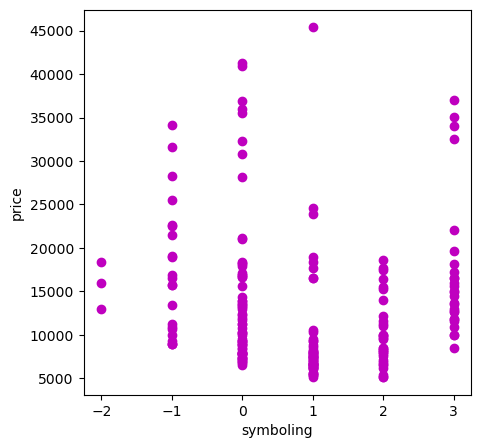

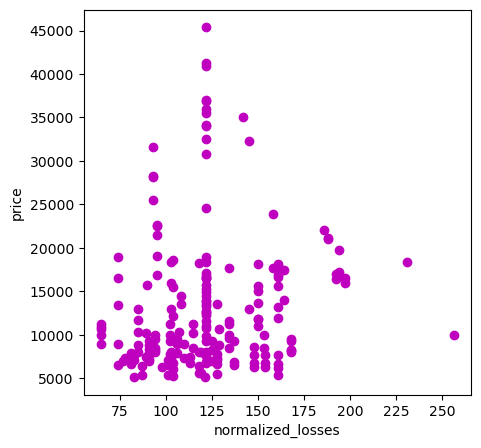

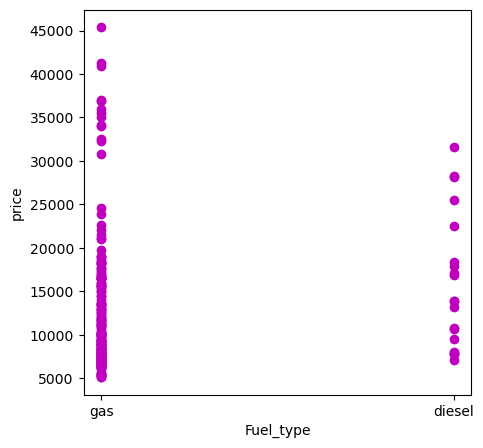

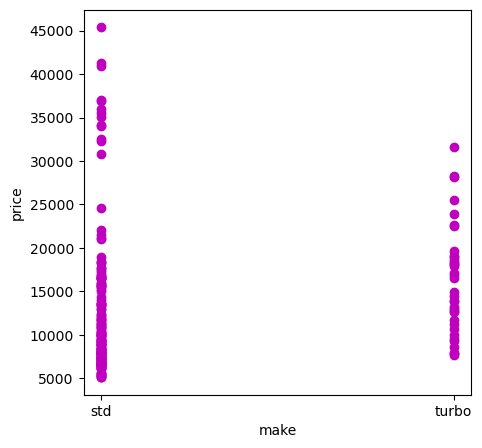

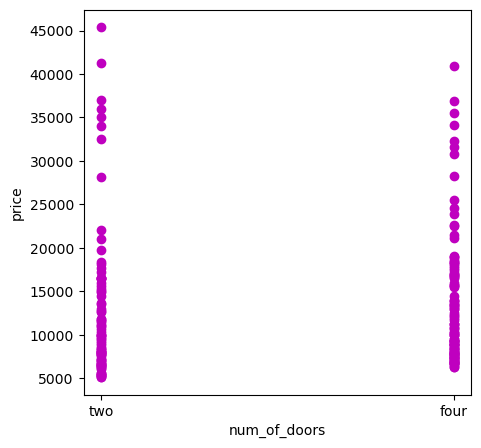

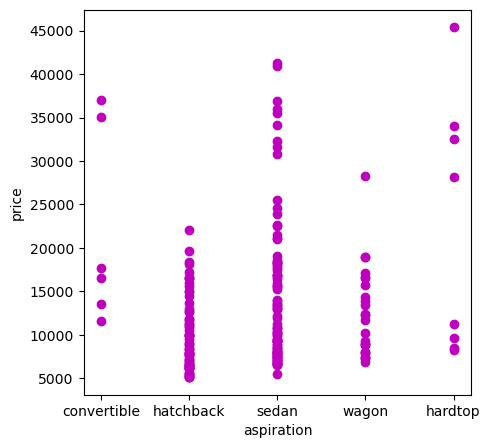

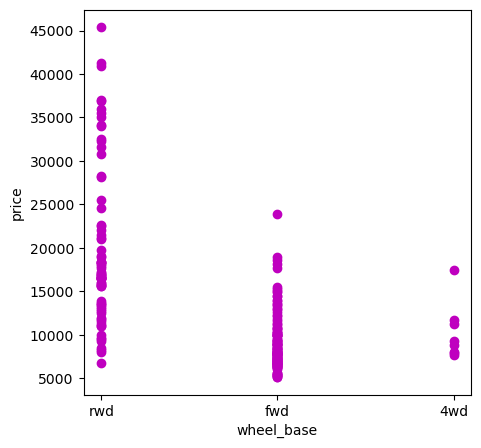

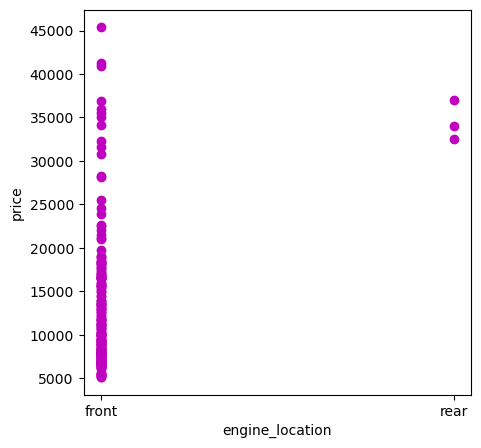

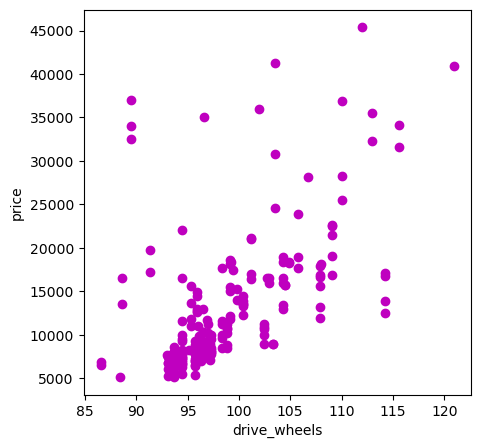

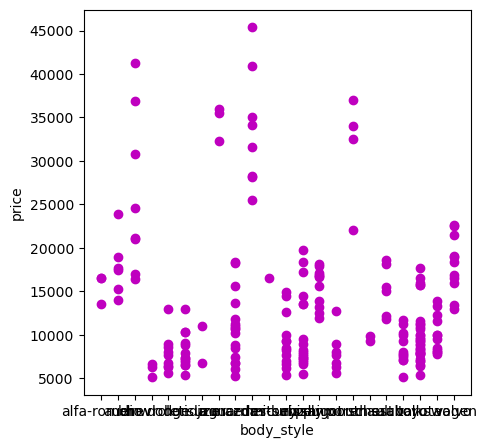

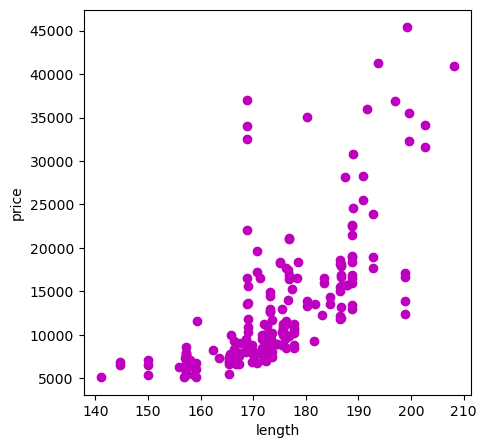

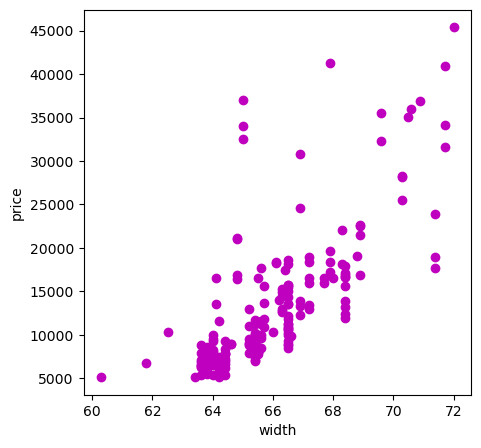

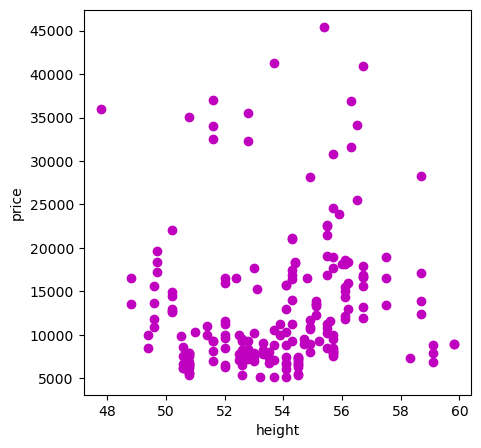

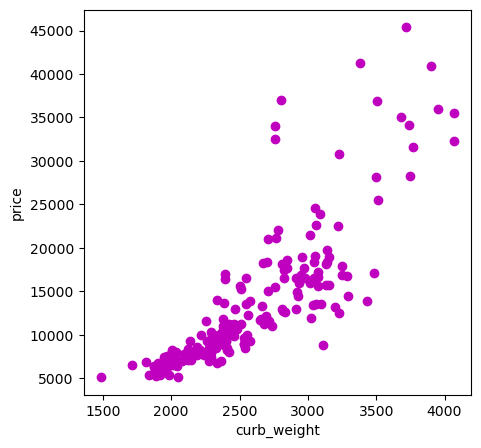

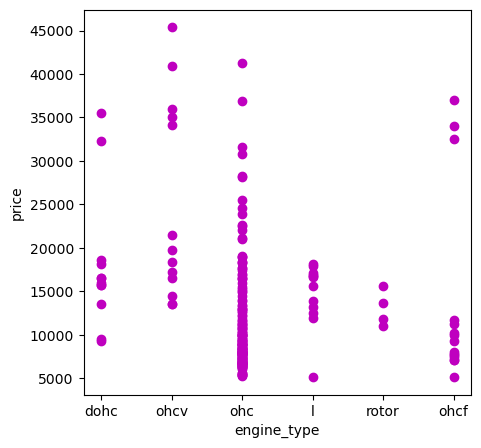

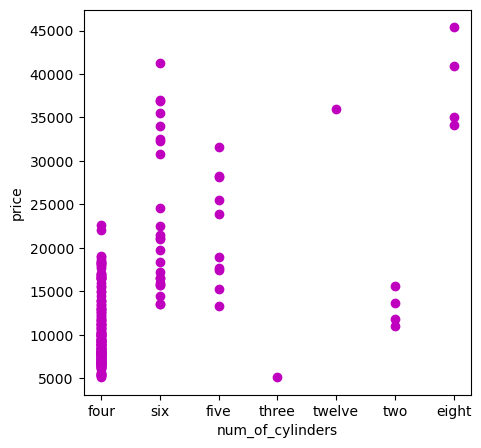

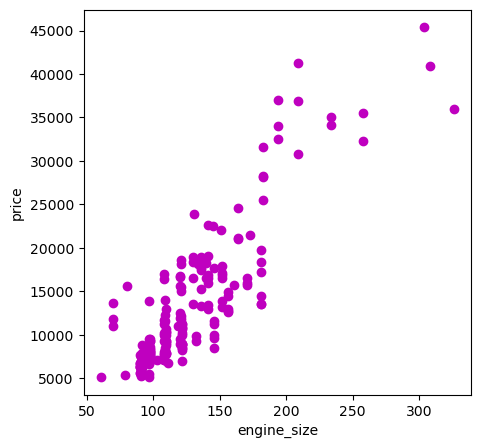

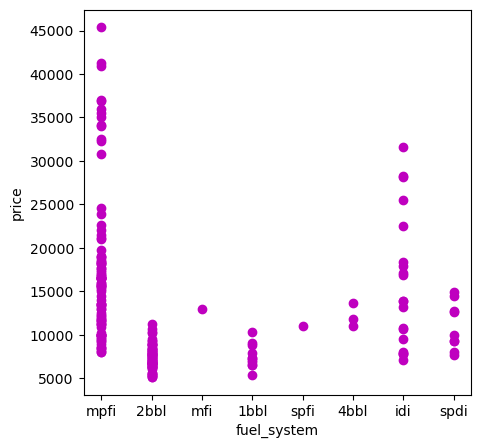

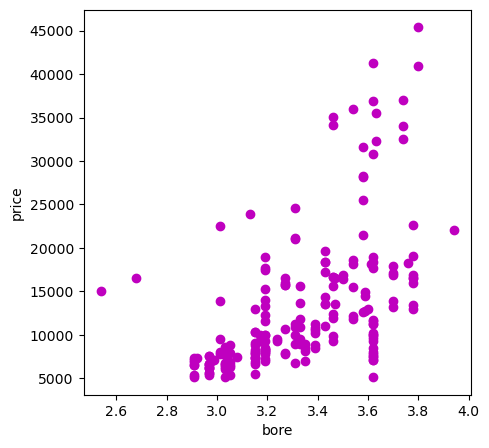

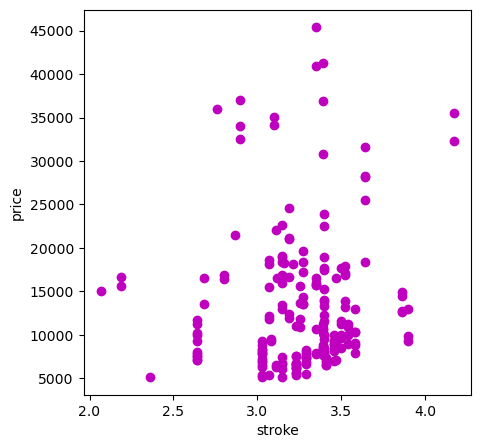

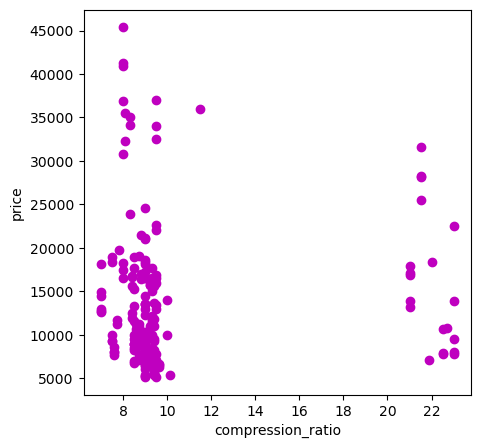

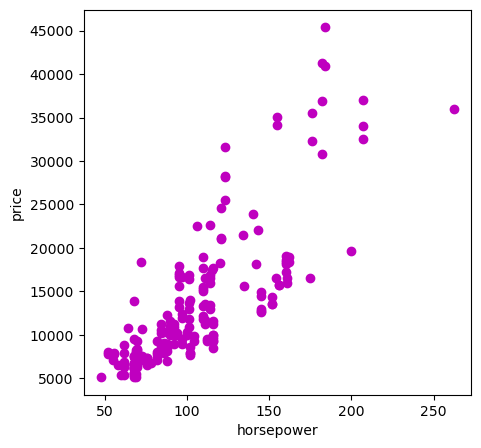

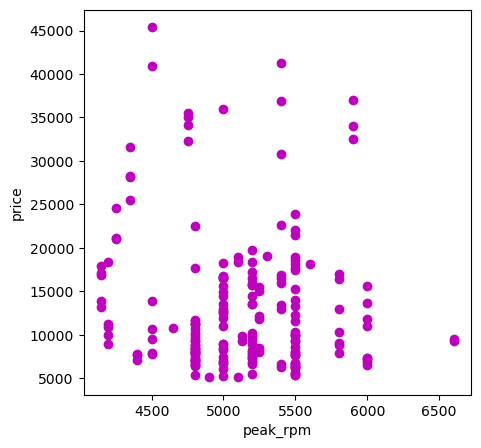

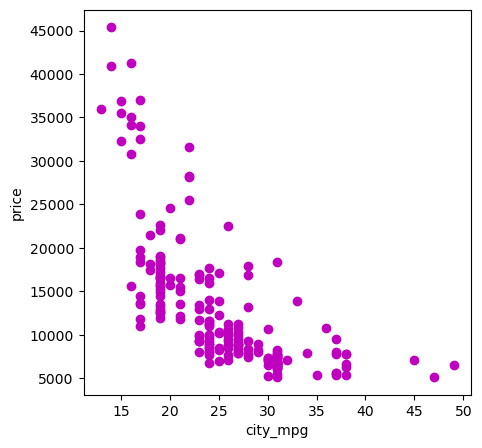

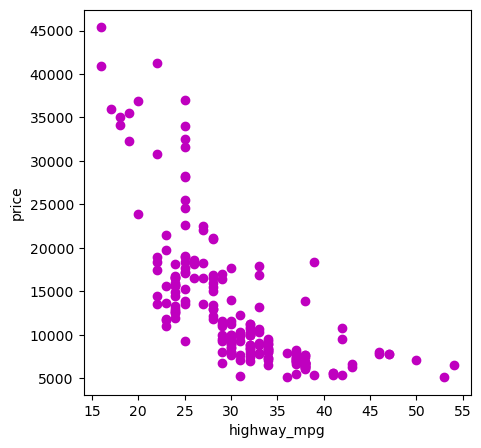

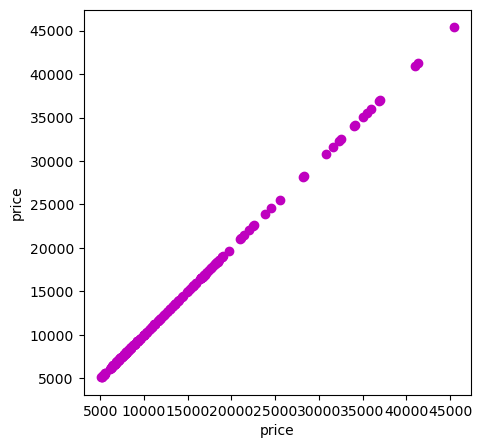

In [12]:
for i in cap.columns:
    x = cap[i]
    y = cap['price']
    plt.figure(figsize=(5,5))
    plt.xlabel(i)
    plt.ylabel('price')
    plt.scatter(x,y, color='m')
    plt.show()

to check linearity between x and y , we will correlation between them

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2128\1672141527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= cap.corr(), annot=True)


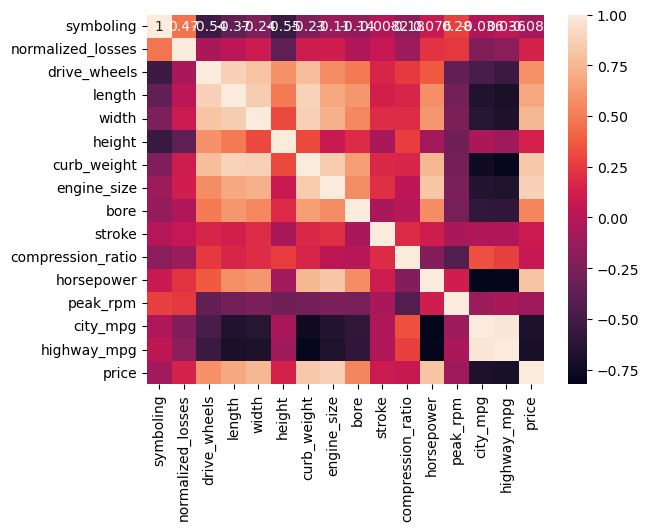

In [13]:
sns.heatmap(data= cap.corr(), annot=True)
plt.show()

In [14]:
cap.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2128\3717551962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cap.corr()


,symboling,normalized_losses,drive_wheels,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized_losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
drive_wheels,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb_weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine_size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


In [15]:
cap.select_dtypes(include=['object']).columns

Index(['Fuel_type', 'make', 'num_of_doors', 'aspiration', 'wheel_base',
       'engine_location', 'body_style', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [16]:
le = LabelEncoder()

In [17]:
cap[cap.select_dtypes(include=['object']).columns]= cap[cap.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [18]:
df1 = cap.iloc[:,:]    # for further reference to outlier problem

In [52]:
cap_train, cap_test = train_test_split(cap, test_size=0.3, random_state=42)

In [53]:
cap_train.shape

(140, 26)

In [54]:
cap_train_x = cap_train.iloc[:,0:-1]
cap_train_y = cap_train.iloc[:,-1]
cap_test_x = cap_test.iloc[:,0:-1]
cap_test_y = cap_test.iloc[:,-1]

In [55]:
cap_train_x.shape

(140, 25)

In [56]:
lr = LinearRegression()         # y = m1x1 + m2x2 +....+c

In [57]:
lr.fit(cap_train_x, cap_train_y)

LinearRegression()

In [58]:
lr.coef_                         # m values  (from equation)

array([ 2.48260105e+02,  3.85833635e+00,  7.32204727e+03,  2.17418219e+03,
       -1.69427627e+03, -1.28176436e+03,  8.97103375e+02,  1.12817037e+04,
        2.20532007e+02, -1.46803579e+02,  3.50874261e+01,  2.30849755e+02,
        2.52150980e+02, -6.80296277e-02,  4.73425115e+02,  2.34068633e+02,
        1.04314622e+02,  2.02766143e+02, -1.83780801e+03, -2.29540529e+03,
        5.79542536e+02,  2.77180852e+00,  1.13676895e+00, -4.53116801e+01,
       -2.97114656e+00])

In [59]:
lr.intercept_                    # c value (from equation)

-59185.02608402667

In [60]:
lr.score(cap_test_x, cap_test_y)*100

85.2768086141034

In [61]:
pred_train_y = lr.predict(cap_train_x)
pred_test_y = lr.predict(cap_test_x)

In [62]:
error_train = cap_train_y - pred_train_y
error_test = cap_test_y - pred_test_y

In [63]:
rsq = lr.score(cap_train_x, cap_train_y)
rsq

0.8994861310927542

In [64]:
n = cap_train_x.shape[0]
k = cap_train_x.shape[1]

In [65]:
adrsq = 1-((1-rsq)*(n-1)/(n-k-1))
adrsq

0.8774436159815161

In [66]:
mse_train = np.mean(np.square(error_train))
mse_test = np.mean(np.square(error_test))
mse_train,mse_test

(4842821.868179245, 13956357.259628575)

In [34]:
rmse_train= np.sqrt(mse_train)
rmse_test= np.sqrt(mse_test)
rmse_train,rmse_test           

(2200.64124022505, 3735.820828095022)

there's not too much difference in train and test mse,rmse so dataset is not much imbalance.

In [35]:
mape = np.mean(np.abs(error_test*100/cap_test_y))
mape

16.646035635702678

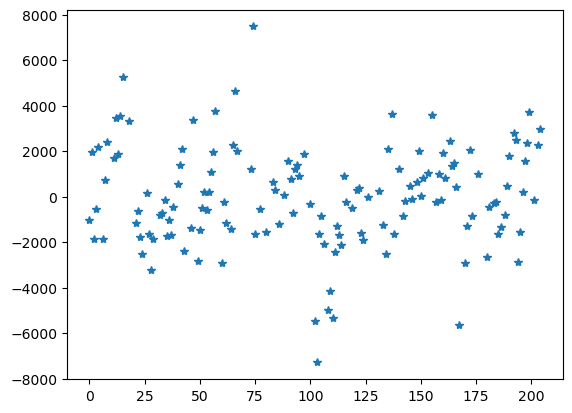

In [36]:
plt.plot(error_train,'*')

(array([ 1.,  4.,  5., 27., 38., 33., 21.,  8.,  2.,  1.]),
 array([-7294.52086352, -5815.60462675, -4336.68838997, -2857.7721532 ,
        -1378.85591642,   100.06032035,  1578.97655713,  3057.8927939 ,
         4536.80903068,  6015.72526745,  7494.64150423]),
 <BarContainer object of 10 artists>)

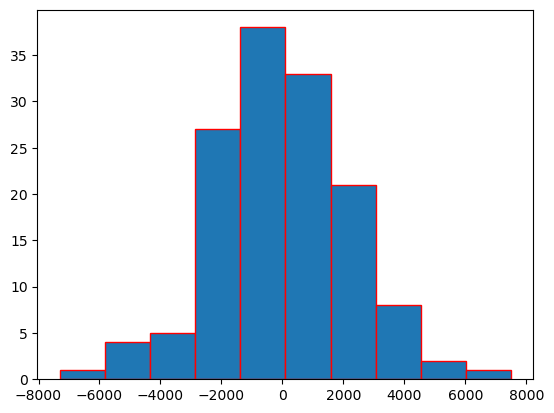

In [37]:
plt.hist(error_train, bins=10, edgecolor='r')

In [38]:
pred_actual_df = pd.DataFrame()
pred_actual_df['Actual']= cap_train_y
pred_actual_df['Predicted']= pred_train_y

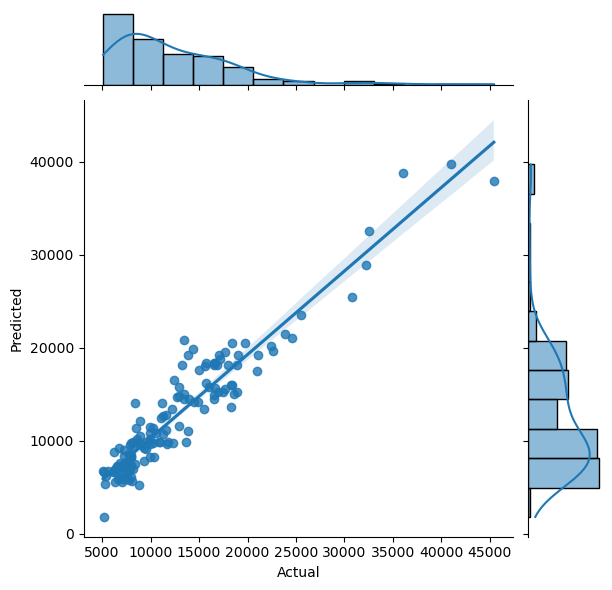

In [39]:
sns.jointplot(x='Actual', y='Predicted', data=pred_actual_df, kind='reg')

removing outliers is important to increase accuracy of model

In [49]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)]
    print(df1.shape)
    print('no. of outliers removed = ', df.shape[0]-df1.shape[0])

In [51]:
remove_outliers(cap, 'price' , 2)      # check accuracy

(187, 26)
no. of outliers removed =  14


polynoial reg used to avoid underfitting..its kind of curved/multidimented reg line due to poly equation. 
 y = a0 + a1x1 + a2(x2)^2 + a3(x3)^3 +.....

In [40]:
#x = df1.iloc[:,0:-1]
#y = df1.iloc[:,-1]

In [41]:
#from sklearn.preprocessing import PolynomialFeatures

In [42]:
#pf =PolynomialFeatures(degree=3)

In [43]:
#pf.fit(x)

In [44]:
#pf.transform(x)

In [45]:
#x = pf.transform(x)

In [46]:
#xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2, random_state= 42)

In [47]:
#lr.fit(xtrain, ytrain)

In [48]:
#lr.score(xtest,ytest)